In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import mixture

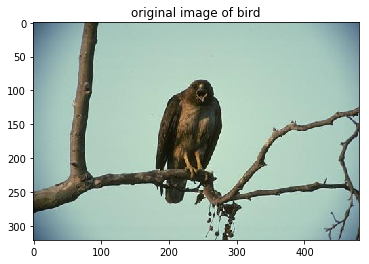

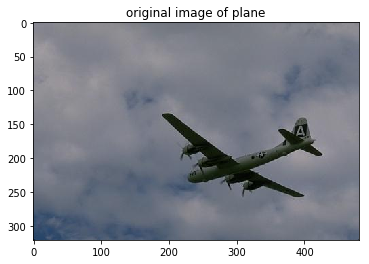

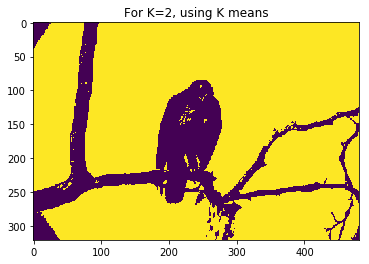

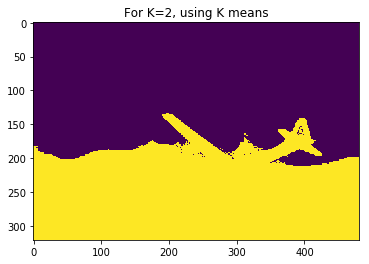

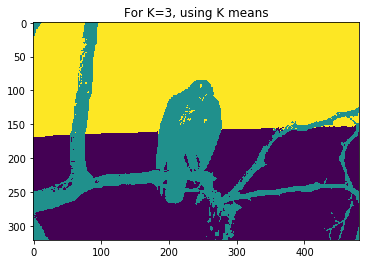

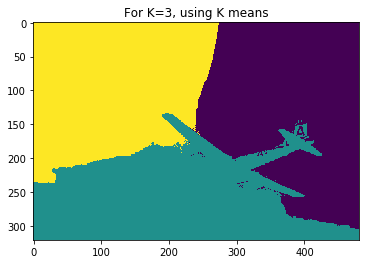

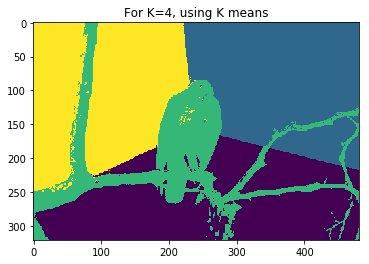

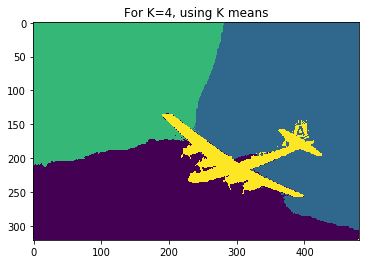

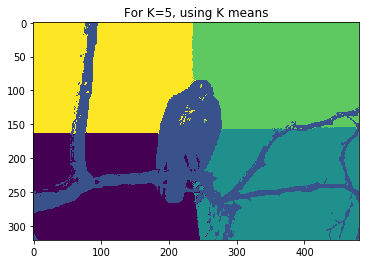

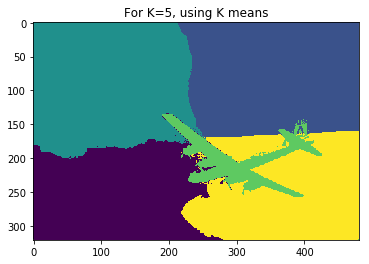

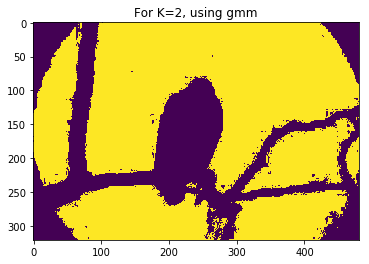

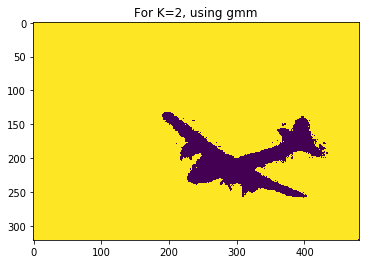

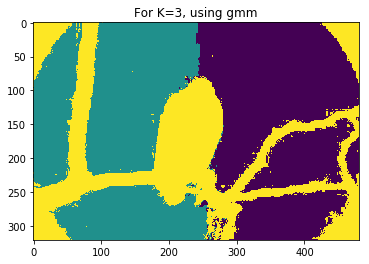

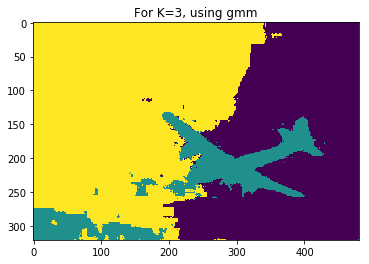

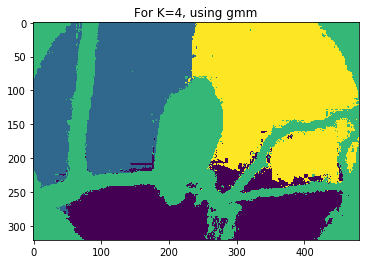

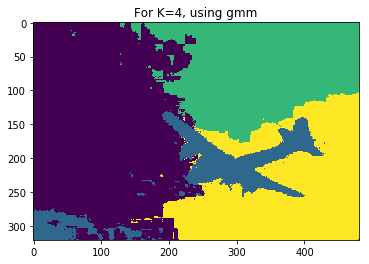

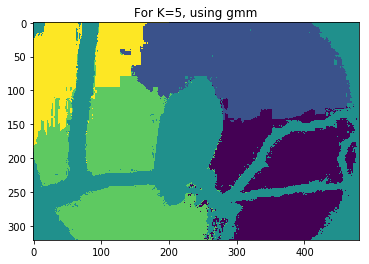

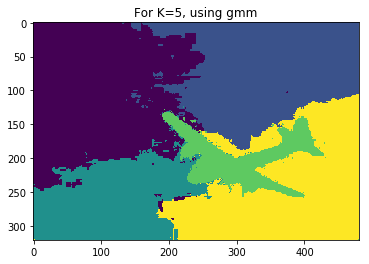

In [19]:
original_image=cv2.imread(r"C:\Users\hp\Downloads\bird.jpg")
original_image2=cv2.imread(r"C:\Users\hp\Downloads\plane.jpg")
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("original image of bird")
plt.show()
img2=cv2.cvtColor(original_image2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.title("original image of plane")
plt.show()
def fun(img):
    im=[]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            im.append([i,j]+list(img[i][j]))
    x=np.asarray(im)
    return x    
x=fun(img)
x2=fun(img2)
x=np.float32(x)
x2=np.float32(x2)
for i in range(5):
    x[:,i]=(x[:,i]-min(x[:,i]))/float(max(x[:,i])-min(x[:,i]))
for i in range(5):
    x2[:,i]=(x2[:,i]-min(x2[:,i]))/float(max(x2[:,i])-min(x2[:,i]))
def ploty(i,x):
    kmeans=KMeans(n_clusters=i).fit(x)
    y=kmeans.labels_.reshape(321,481)
    plt.imshow(y)
ploty(2,x)
plt.title("For K=2, using K means")
plt.show()
ploty(2,x2)
plt.title("For K=2, using K means")
plt.show()
ploty(3,x)
plt.title("For K=3, using K means")
plt.show()
ploty(3,x2)
plt.title("For K=3, using K means")
plt.show()
ploty(4,x)
plt.title("For K=4, using K means")
plt.show()
ploty(4,x2)
plt.title("For K=4, using K means")
plt.show()
ploty(5,x)
plt.title("For K=5, using K means")
plt.show()
ploty(5,x2)
plt.title("For K=5, using K means")
plt.show()
def gmms(i,x):    
    gmm=mixture.GaussianMixture(n_components=i,covariance_type="full")
    gmm.fit(x)
    y=gmm.predict(x).reshape(321,481)
    plt.imshow(y)
gmms(2,x)
plt.title("For K=2, using gmm")
plt.show()
gmms(2,x2)
plt.title("For K=2, using gmm")
plt.show()
gmms(3,x)
plt.title("For K=3, using gmm")
plt.show()
gmms(3,x2)
plt.title("For K=3, using gmm")
plt.show()
gmms(4,x)
plt.title("For K=4, using gmm")
plt.show()
gmms(4,x2)
plt.title("For K=4, using gmm")
plt.show()
gmms(5,x)
plt.title("For K=5, using gmm")
plt.show()
gmms(5,x2)
plt.title("For K=5, using gmm")
plt.show()


QUESTION 2

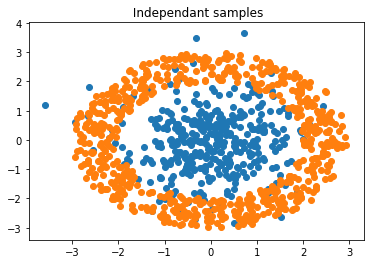

In [28]:
p=[0.35,0.65]
def randgen(s,p):
    k=0
    b=np.random.choice(2,s,p=[p[0],p[1]])
    for i in b:
        if i==1:
            k=k+1
    s1=[s-k,k]
    return s1
x=randgen(1000,p)
mean1=[0,0]
cov1=np.array([[1,0],[0,1]])
rad1= np.random.multivariate_normal(mean1, cov1, x[0])
rad2=np.random.uniform(low=-np.pi,high=np.pi,size=x[1])
rad=np.random.uniform(low=2,high=3,size=x[1])
x=rad*np.cos(rad2)
y=rad*np.sin(rad2)
z = np.column_stack((x,y))
plt.scatter(rad1[:,0],rad1[:,1],label='Class 1')
plt.scatter(z[:,0],z[:,1],label='Class 2')
plt.title(' Independant samples')
plt.show()


In [29]:
l=[]
q=[]
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import numpy as np
X=np.concatenate((rad1,z),axis=0)
y=np.concatenate((np.ones(rad1.shape[0]),np.zeros(z.shape[0])),axis=0)
for i in range(-5,3):
    l.append(10**i)
for i in l:
    te=[]
    te1=[]
    c = SVC(C = i, kernel = 'linear')
    d = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in d.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        c.fit(X_train, y_train)
        pr=c.predict(X_test)
        te.append(pr)
        pr1=c.predict(X_train)
        te1.append(pr1)

Text(0.5, 1.0, ' Probability of errors for a Linear SVM classifier')

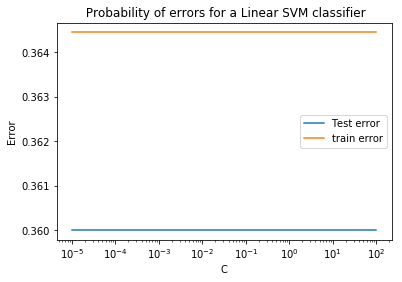

In [30]:
for n in range (len(te)):
    co=0
    for i in range (y_test.shape[0]):
        if te[n][i]!=y_test[i]:
            co=co+1
    q.append(co)
q1=[]
for n in range(len(te1)):
    co1=0
    for i in range(y_train.shape[0]):
        if te1[n][i]!=y_train[i]:
            co1=co1+1
    q1.append(co1)  
plt.plot(l,np.array(q[:8])/100,label="Test error")
plt.plot(l,np.array(q1[:8])/900,label="train error")
plt.legend()
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Error")
plt.title(" Probability of errors for a Linear SVM classifier")

Class 1 points correctly classified 636
Class 1 points misclassified 0
Class 2 points misclassified 364
Class 2 correctly classified 0


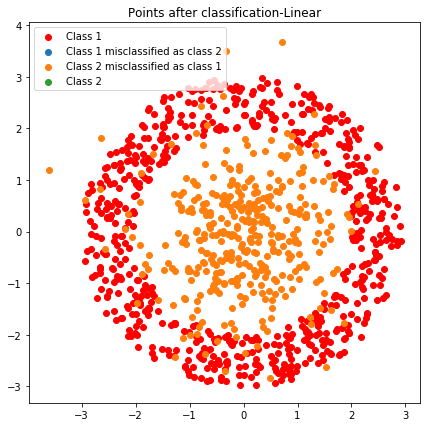

In [55]:
c = SVC(C = 5, kernel = 'linear')
c.fit(X,y)
prd=c.predict(X)
c00=X[((y==0) & (prd==0))]
c01=X[((y==0) & (prd==1))]
c10=X[((y==1) & (prd==0))]
c11=X[((y==1) & (prd==1))]
def plotting(c00,c01,c10,c11):
    plt.figure(figsize=(7,7))
    plt.scatter(c00.T[0,:],c00.T[1,:],label='Class 1 ',color='r')
    plt.scatter(c01.T[0,:],c01.T[1,:],label='Class 1 misclassified as class 2')
    plt.scatter(c10.T[0,:],c10.T[1,:],label='Class 2 misclassified as class 1')
    plt.scatter(c11.T[0,:],c11.T[1,:],label='Class 2')
    plt.legend()
plotting(c00,c01,c10,c11)
plt.title('Points after classification-Linear')
print("Class 1 points correctly classified",c00.shape[0]) 
print("Class 1 points misclassified",c01.shape[0]) 
print("Class 2 points misclassified",c10.shape[0])
print("Class 2 correctly classified",c11.shape[0])

So here, all points are getting classified as class 1 points

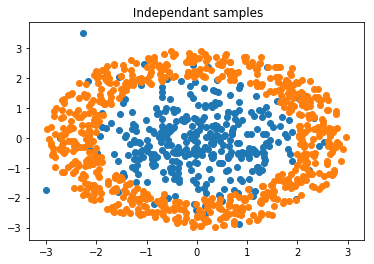

Class 1 points correctly classified 636
Class 1 points misclassified 0
Class 2 points misclassified 364
Class 2 correctly classified 0


<Figure size 720x720 with 0 Axes>

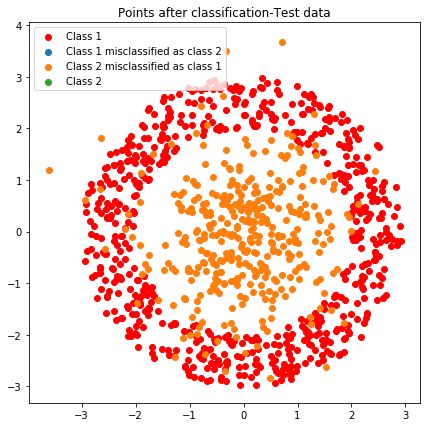

In [56]:
s=1000
x=randgen(1000,p)
mean1=[0,0]
cov1=np.array([[1,0],[0,1]])
rad1= np.random.multivariate_normal(mean1, cov1, x[0])
rad=np.random.uniform(low=2,high=3,size=x[1])
rad2=np.random.uniform(low=-np.pi,high=np.pi,size=x[1])
x=rad*np.cos(rad2)
x.reshape(x.shape[0],1)
ym=rad*np.sin(rad2)
ym.reshape(ym.shape[0],1)
z = np.column_stack((x,ym))
plt.scatter(rad1[:,0],rad1[:,1],label='Class 1')
plt.scatter(z[:,0],z[:,1],label='Class 2')
plt.title(' Independant samples')
plt.show()
X_test=np.concatenate((rad1,z),axis=0)
y1_test=np.ones(rad1.shape[0])
y2_test=np.zeros(z.shape[0])
y_test=np.concatenate((y1_test,y2_test),axis=0)
prdt=c.predict(X_test)
c00=X[((y==0) & (prdt==0))]
c01=X[((y==0) & (prdt==1))]
c10=X[((y==1) & (prdt==0))]
c11=X[((y==1) & (prdt==1))]
plt.figure(figsize=(10,10))
plotting(c00,c01,c10,c11)
plt.title('Points after classification-Test data')
plt.legend()
print("Class 1 points correctly classified",c00.shape[0]) 
print("Class 1 points misclassified",c01.shape[0]) 
print("Class 2 points misclassified",c10.shape[0])
print("Class 2 correctly classified",c11.shape[0])

Again, nothing is being classified in class 2

In [33]:
l1=[]
l2=[]
for i in range(-5,5,1):
    l1.append(10**i)
for i in range(-4,5,1):
    l2.append(10**i)
def tr(l1,l2,X,f):
    arr=[]
    for j in l1:
        n=[]
        for i in l2:
            te=[]
            c = SVC(C = i, kernel = 'rbf',gamma=j)
            d = KFold(n_splits=10, shuffle=True)
            for train_index, test_index in d.split(X):
                X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
                c.fit(X_train, y_train)
                if f == 1:
                    pr=c.predict(X_test)
                else:
                    pr=c.predict(X_train)
                te.append(pr)
            n.append(te)
        arr.append(n)
    if f == 1:
        return arr,y_test
    else:
        return arr,y_train
def op(te, y_test):
    k = []
    for n in range (len(te)):
        count=0
        for i in range (0, len(te[0])):
            if te[n][i]!=y_test[i]:
                count=count+1
        k.append(count)
    return np.mean(k)
v = []

arr,y_t = tr(l1,l2,X,1)
for i in range(0,len(l1)):
    for j in range(0,len(l2)):
        v.append(op(arr[i][j],y_t))

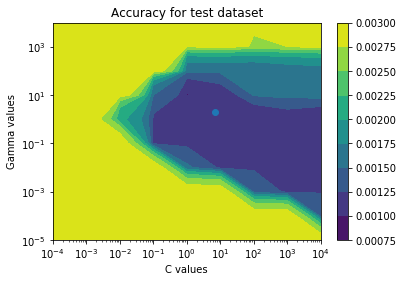

In [38]:
xc,yc=np.meshgrid(l2,l1)
v = np.array(v)/100
v = v.reshape([len(l1),len(l2)])
v_min = np.argmin(v)
x1 = v_min//(len(l))
y1 = v_min%(len(l))
plt.contourf(xc,yc,v)
plt.plot(x1,y1,marker='o')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel("C values")
plt.ylabel("Gamma values")
plt.title("Error for test dataset")
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'level'
  s)


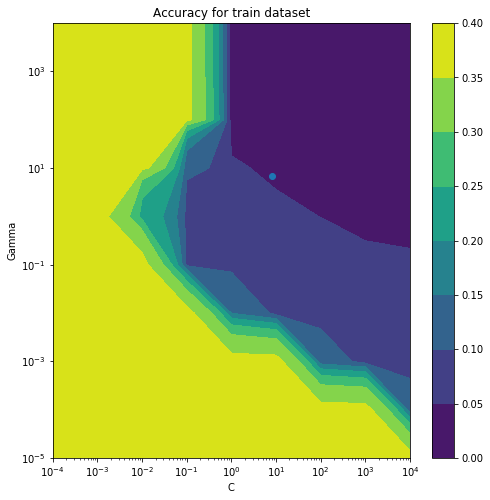

In [58]:
k = []
flag = 0
arr,y_t = tr(l1,l2,X,0)
for i in range(0,len(l1)):
    for j in range(0,len(l2)):
        k.append(op(arr[i][j],y_t))
k = np.array(k)/900
k = k.reshape([len(l1),len(l2)])
k_min = np.argmin(k)
xmin = k_min//(len(l))
ymin = k_min%(len(l))
plt.contourf(xc,yc,k,level=[50,60,70,80,90,100])
plt.plot(xmin,ymin,marker='o')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel("C")
plt.ylabel("Gamma")
plt.title("Error for train dataset")
plt.show()

Class 1 points correctly classified 634
Class 1 points misclassified 2
Class 2 points misclassified 33
Class 2 correctly classified 331


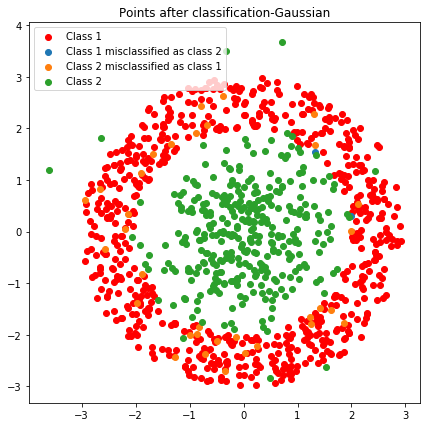

In [59]:
c_rbf = SVC(C = 10, kernel = 'rbf',gamma=10)
c_rbf.fit(X,y)
prbf=c_rbf.predict(X)
c00=X[((y==0) & (prbf==0))]
c01=X[((y==0) & (prbf==1))]
c10=X[((y==1) & (prbf==0))]
c11=X[((y==1) & (prbf==1))]
plotting(c00,c01,c10,c11)
plt.title('Points after classification-Gaussian')
print("Class 1 points correctly classified",c00.shape[0]) 
print("Class 1 points misclassified",c01.shape[0]) 
print("Class 2 points misclassified",c10.shape[0])
print("Class 2 correctly classified",c11.shape[0])

Here, for gaussian, probability of error is 0.035

Class 1 points correctly classified 611
Class 1 points misclassified 25
Class 2 points misclassified 67
Class 2 correctly classified 297


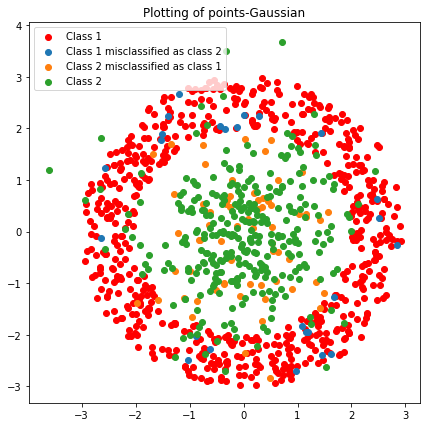

In [62]:
x=rad*np.cos(rad2)
ym=rad*np.sin(rad2)
z = np.column_stack((x,ym))
X_test=np.concatenate((rad1,z),axis=0)
y1_test=np.ones(rad1.shape[0])
y2_test=np.zeros(z.shape[0])
y_test=np.concatenate((y1_test,y2_test),axis=0)
pred_rbf=c_rbf.predict(X_test)
c00=X[((y==0) & (pred_rbf==0))]
c01=X[((y==0) & (pred_rbf==1))]
c10=X[((y==1) & (pred_rbf==0))]
c11=X[((y==1) & (pred_rbf==1))]
plotting(c00,c01,c10,c11)
plt.title('Plotting of points-Gaussian')
plt.legend()
print("Class 1 points correctly classified",c00.shape[0]) 
print("Class 1 points misclassified",c01.shape[0]) 
print("Class 2 points misclassified",c10.shape[0])
print("Class 2 correctly classified",c11.shape[0])

Here, probability of error for gaussian is 0.092.

Thus we see that linear performs poorly with non linear data as compared to gaussian as gaussian gives lower probability of error